In [317]:
# Link da aula
# https://www.youtube.com/watch?v=FEVV2YY60Yk&t=1262s

# https://ivanildo-batista13.medium.com/pycaret-para-s%C3%A9ries-temporais-8c258f53c830

# carregar modelo
# https://ivanildo-batista13.medium.com/pycaret-para-s%C3%A9ries-temporais-8c258f53c830

# https://towardsdatascience.com/time-series-forecasting-with-pycaret-regression-module-237b703a0c63 --> ainda não visto

In [318]:
#!pip install pycaret

In [319]:
#!pip install pycaret-ts-alpha

In [320]:
#!pip install jinja2

In [321]:
#!pip install markupsafe==2.0.1

In [322]:
#!pip install prophet

In [323]:
#!pip install tsfresh

In [324]:
#!pip install sktime[all_extras] #get_test_params

In [325]:
import tsfresh # get_test_params

In [326]:
import prophet

In [327]:
import pycaret

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 22,10

In [329]:
from sklearn.metrics import mean_squared_error, r2_score

In [330]:
df = pd.read_excel('/content/DataFrame_Processos_Percentual_Base_CompletaAjusteOutLiers.xlsx')
df.Dtinicio = pd.to_datetime(df.DiaInicio)
df.set_index('DiaInicio', inplace=True)
df.head(3)

,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao
DiaInicio,,,,,
2021-01-05,2021-01-05 05:21:00,2021-01-05 07:40:00,Rotina_01,139,321.0
2021-01-06,2021-01-06 04:13:00,2021-01-06 05:54:00,Rotina_01,101,253.0
2021-01-07,2021-01-07 03:30:00,2021-01-07 05:24:00,Rotina_01,114,210.0


In [331]:
# Filtra somente pelo Processo 04 - caso de uso para avaliação em questão
# Foi o que a princípio apresentou lentidão ao rodar em concorrência com o Processo 01
df = df.loc[df['Processo']=='Rotina_04'] #--> este é o correto

#### apenas para testes - fazer com base menor
#df = df.loc[(df['Processo']=='Rotina_04') & (df['DtHoraInicio']>='2021-09-01')]
#### apenas para testes

coluna = 'TempoMinutosInicioExecucao' # 'TempoMinutos' / 'TempoMinutosInicioExecucao'

# Cria Dataframe somente com as colunas que interessam
df = pd.DataFrame(df, columns = [coluna])
df.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,164.0
2021-01-06,136.0
2021-01-07,267.0


In [332]:
# PADRONIZAÇÃO
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [333]:
# Padronização a ser passada para o DataFrame
scaler.fit(df)
scaled_train = scaler.transform(df)

In [334]:
# Atualiza DataFrame com Padronização
df[coluna] = scaled_train
df.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,0.095713
2021-01-06,0.079272
2021-01-07,0.156195


<AxesSubplot:xlabel='DiaInicio'>

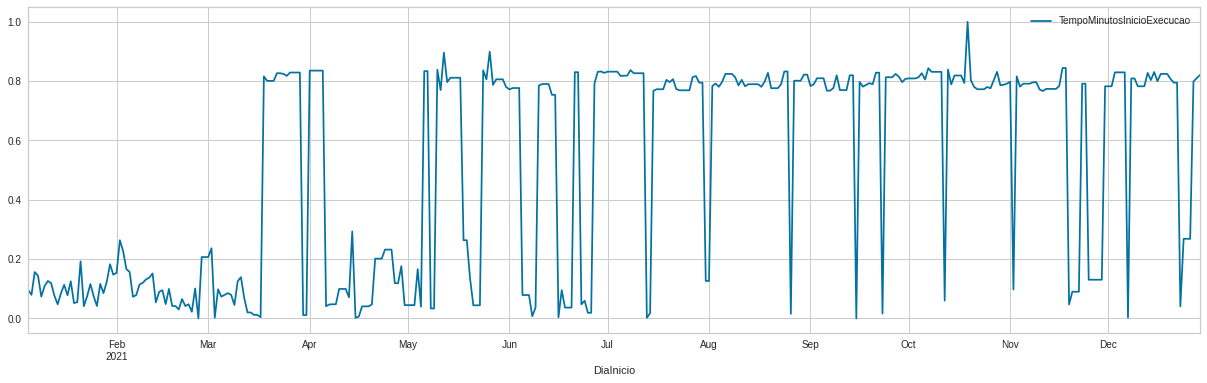

In [335]:
df.plot(grid=True)

In [336]:
# Configurando os dados
from pycaret.time_series import *

In [337]:
# Define tamanho da base
tamanho_base = df.count() # 359 linhas
tamanho_base

TempoMinutosInicioExecucao    359
dtype: int64

In [338]:
# Define tamanho base Treino e Teste - usaremos inicialmente 2/3 para treinar e 1/3 para testar
train_size = int(tamanho_base * 2 / 3)
train_size

239

In [339]:
# Define bases de treino
train_set = df[:train_size]
train_set.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,0.095713
2021-01-06,0.079272
2021-01-07,0.156195


In [340]:
# Define bases de teste
test_set = df[train_size:]
test_set.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-09-01,0.783324
2021-09-02,0.789783
2021-09-03,0.809748


In [341]:
test_size = int(test_set.count())
test_size

120

In [342]:
# Base tem 359 linhas - 2/3 (239) para treino e 1/3 (120) para testes
setup(df, fh=test_size, fold=1, session_id=123)
# fh: quantidade de previsões que serão a feitas a partir do dataframe de treino (df)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: f9af
INFO:logs:self.variable_keys: {'fold_generator', 'enforce_pi', 'pipeline', 'fold_param', 'X_train', '_available_plots', 'seed', 'y_test_transformed', 'fold_groups_param_full', 'index_type', 'strictly_positive', 'all_sp_values', 'seasonality_present', 'enforce_exogenous', 'idx', 'seasonal_period', 'X_transformed', 'exp_id', 'logging_param', 'master_model_container', 'X_train_transformed', 'variable_keys', '_gpu_n_jobs_param', 'y_train', '_all_models', 'n_jobs_param', 'gpu_param', 'X_test_transformed', 'exp_name_log', '_all_models_internal', 'X_test', 'primary_sp_to_use', 'approach_type', '_all_metrics', 'y_transformed', 'data', 'log_plots_param', '_ml_usecase', 'exogenous_present', 'experiment__', 'y_test', 'USI', 'fh', 'memory', 'X', 'html_param', 'y_train_transformed', 'y', 'display

,Description,Value
0,session_id,123
1,Target,TempoMinutosInicioExecucao
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(359, 1)"
5,Train data shape,"(239, 1)"
6,Test data shape,"(120, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,1
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.43s...............


In [343]:
# Avaliação estatística
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,359.0
1,Summary,Statistics,Actual,Mean,,0.50998
2,Summary,Statistics,Actual,Median,,0.776277
3,Summary,Statistics,Actual,Standard Deviation,,0.354943
4,Summary,Statistics,Actual,Variance,,0.125984
5,Summary,Statistics,Actual,Kurtosis,,-1.794364
6,Summary,Statistics,Actual,Skewness,,-0.381103
7,Summary,Statistics,Actual,# Distinct Values,,207.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",1496.380721
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",2234.574188


In [344]:
# Treinando o Modelo
best = compare_models(sort='RMSE')

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
polytrend,Polynomial Trend Forecaster,0.359,0.3683,5.5703,0.8113,2.2178,1.2757,-0.346,0.04
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.3619,0.3746,4.9034,0.8206,2.2356,1.2975,-0.3924,0.11
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.3619,0.3746,4.9034,0.8206,2.2356,1.2975,-0.3924,0.12
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,0.3619,0.3746,4.9034,0.8206,2.2356,1.2975,-0.3924,0.09
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.3712,0.3858,4.6963,0.8485,2.2929,1.3365,-0.4772,0.57
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,0.3711,0.3875,4.6821,0.8533,2.2925,1.3423,-0.4903,0.12
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.3782,0.394,4.5296,0.8713,2.3363,1.3649,-0.5409,12.46
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.378,0.3962,4.5633,0.8774,2.3352,1.3724,-0.5578,0.09
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.3815,0.3977,4.479,0.8791,2.3563,1.3775,-0.5693,12.57
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,0.38,0.3987,4.5262,0.8826,2.3471,1.381,-0.5772,0.10


INFO:logs:master_model_container: 27
INFO:logs:display_container: 2
INFO:logs:PolynomialTrendForecaster()
INFO:logs:compare_models() successfully completed......................................


In [345]:
# Escolha do compare_models()
best

PolynomialTrendForecaster()

In [346]:
# Parâmetros
best.get_params()

{'degree': 1, 'regressor': None, 'with_intercept': True}

In [347]:
# Para o estudo será usado o Auto-Arima
modelo_AutoArima = create_model("auto_arima")

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-05-03,0.5007,0.545,2.8235,1.2249,3.0928,1.888,-1.948
Mean,NaT,0.5007,0.545,2.8235,1.2249,3.0928,1.888,-1.948
SD,NaT,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.000


INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:AutoARIMA(random_state=123, sp=7, suppress_warnings=True)
INFO:logs:create_model() successfully completed......................................


In [348]:
modelo_AutoArima.get_fitted_params()

{'aic': -15.107276230129862,
 'aicc': -15.090327077587489,
 'bic': -11.635005556458388,
 'hqic': -13.70788894150061,
 'order': (0, 1, 0),
 'seasonal_order': (0, 0, 0, 7),
 'sigma2': 0.05448850261750249}

In [349]:
#final_modelo_AutoArima = finalize_model(modelo_AutoArima)
#final_modelo_AutoArima
# ??????

In [350]:
modelo_AutoArima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  239
Model:               SARIMAX(0, 1, 0)   Log Likelihood                   8.554
Date:                Sun, 07 Aug 2022   AIC                            -15.107
Time:                        02:10:52   BIC                            -11.635
Sample:                             0   HQIC                           -13.708
                                - 239                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0545      0.002     23.863      0.000       0.050       0.059
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):               568.91
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               6.25   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [351]:
# CALCULAR RMSE - Avaliação do modelo
# Abaixo temos duas métricas de avaliação : o RMSE e R². A primeira é mais usada para 
# comparar entre vários modelos, onde o melhor modelo é aquele cujo valor dessa métrica 
# esteja mais próximo de zero. O segundo (R²) nos dá o quanto os valores treinados/preditos 
# estão alinhados com os valores de treino

In [352]:
# Base = 359    # Treino = 239     # Teste = 359 - 239 = 120 
#tamanho_base_teste = test_set.shape[0]
tamanho_base_teste = int(test_set.count()) # Necessário converter para int pois dava erro na linha abaixo por estar como Int64
tamanho_base_teste

120

In [353]:
# Avaliação na base de testes

In [354]:
# Gerando valores preditivos 
#predict_model(modelo_AutoArima, fh = 120)
future_forecast = predict_model(modelo_AutoArima)

INFO:logs:Preparing display monitor


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,Auto ARIMA,0.1285,0.2792,3.085341e+13,0.2596,0.5556,0.7275,-0.2367


In [355]:
print("Com padronização - Avaliação base Teste")
print("RMSE do modelo : %.3f" % np.sqrt(mean_squared_error(test_set, future_forecast)))
print("R² do modelo : %.3f" % r2_score(test_set, future_forecast))

Com padronização - Avaliação base Teste
RMSE do modelo : 0.279
R² do modelo : -0.237


In [356]:
# Avaliação na base de treino

In [357]:
# Criar data frame com valores preditos de alterar NaN para zero - ocorria 
# em '2021-01-05' por ser o 1º dia e não ter como prever
#modelo_AutoArima.predict_residuals()
df_predito = pd.DataFrame(modelo_AutoArima.predict_residuals()) # valores preditos no treino do modelo
df_predito.fillna(0, inplace=True)

In [358]:
print("Com padronização - Avaliação base Treino")
print("RMSE do modelo : %.3f" % np.sqrt(mean_squared_error(train_set, df_predito)))
print("R² do modelo : %.3f" % r2_score(train_set, df_predito))

Com padronização - Avaliação base Treino
RMSE do modelo : 0.547
R² do modelo : -1.302


In [359]:
# Gerar RMSE na escala original - sem a padronização entre 0 e 1

In [360]:
# Retorna valores sem a padronização - escala original
future_forecast = scaler.inverse_transform(future_forecast)
test_set[coluna] = np.reshape(scaler.inverse_transform([test_set[coluna]]), (tamanho_base_teste,1))

In [361]:
print("Sem padronização - Avaliação base Teste")
print("RMSE do modelo : %.3f" % np.sqrt(mean_squared_error(test_set, future_forecast)))
print("R² do modelo : %.3f" % r2_score(test_set, future_forecast))

Sem padronização - Avaliação base Teste
RMSE do modelo : 475.437
R² do modelo : -0.237


In [362]:
# Retorna valores sem a padronização - escala original
df_predito = scaler.inverse_transform(df_predito)
train_set[coluna] = np.reshape(scaler.inverse_transform([train_set[coluna]]), (train_size,1))

In [363]:
print("Sem padronização - Avaliação base treino")
print("RMSE do modelo : %.3f" % np.sqrt(mean_squared_error(train_set, df_predito)))
print("R² do modelo : %.3f" % r2_score(train_set, df_predito))

Sem padronização - Avaliação base treino
RMSE do modelo : 931.120
R² do modelo : -1.302


In [364]:
# A partir deste ponto são gráficos

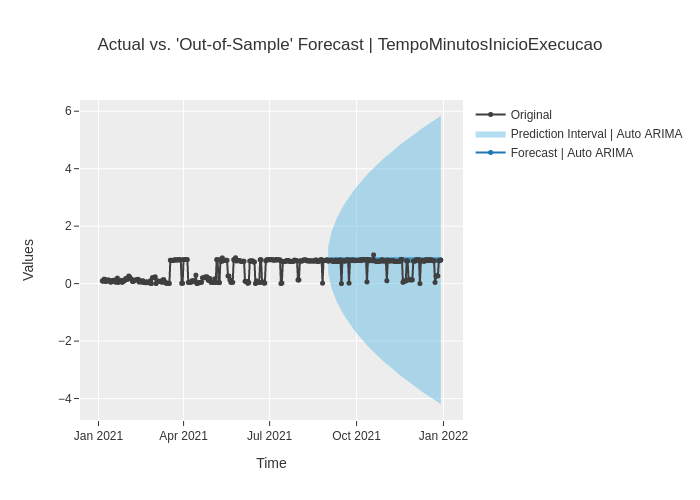

INFO:logs:Visual Rendered Successfully


In [372]:
plot_model(modelo_AutoArima)

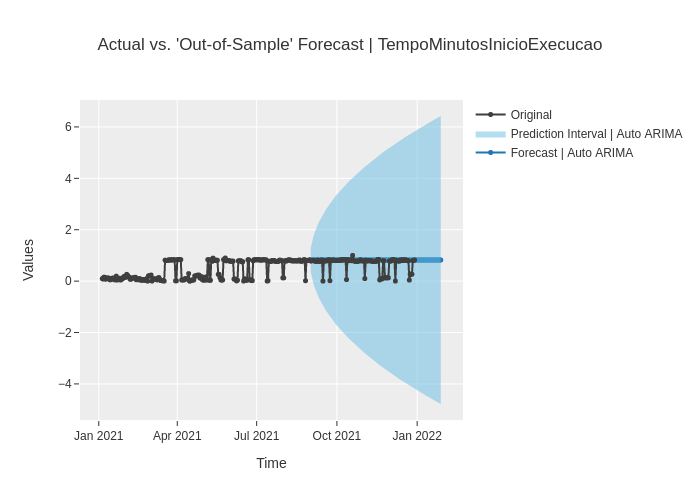

INFO:logs:Visual Rendered Successfully


In [373]:
# Prevendo além dos dados - Exponential Smoothing
plot_model(modelo_AutoArima, plot='forecast', data_kwargs = {'fh' : 150}) # prevendo 150 dias

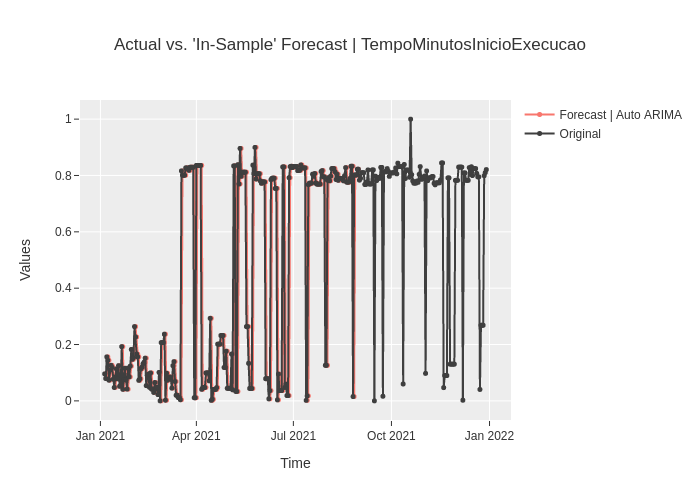

INFO:logs:Visual Rendered Successfully


In [367]:
plot_model(modelo_AutoArima, plot='insample')

In [368]:
# Salvando o modelo
# save_model(modelo_AutoArima, 'my_model')